# Visualizing CNN Kernels
## Objective
Understand how different convolutional kernels process and extract features from images.

## Setup

In [1]:
# Import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D


In [3]:
# Load and prepare data
path = "../material/fox.jpg" # replace with your own image if you want (remove or edit rotatio to fit new pic).
img = Image.open(path).convert('L').rotate(270).resize((150,150)) 
image_array = tf.keras.utils.img_to_array(img) # Convert to tensor
image_array = tf.expand_dims(image_array, 0)  # Create a batch


## Exercise

### Define different kernels
Create various kernels to see the different effects (edge detection, sharpening, blurring etc)

In [4]:

kernels = {
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Blur": np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9.0,
}


### Apply Kernels to the Image
Create a simple CNN model with a single convolutional layer for each kernel.
Apply the kernel to the image and display the output.


1/1 [==============================] - 0s 123ms/step


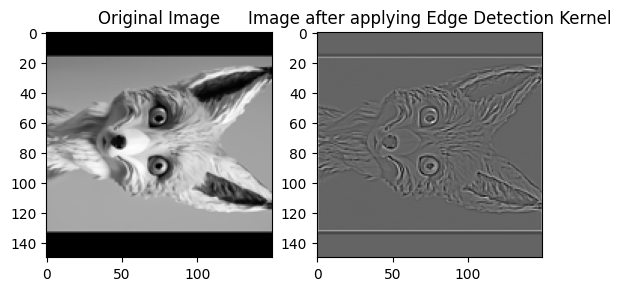

1/1 [==============================] - 0s 63ms/step


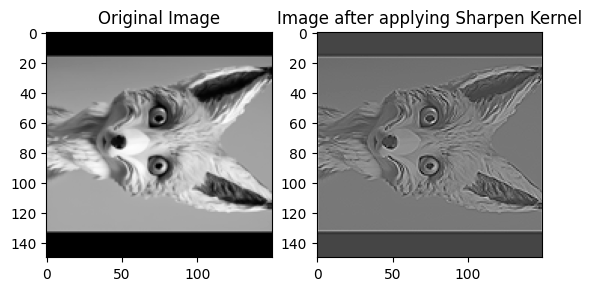

1/1 [==============================] - 0s 59ms/step


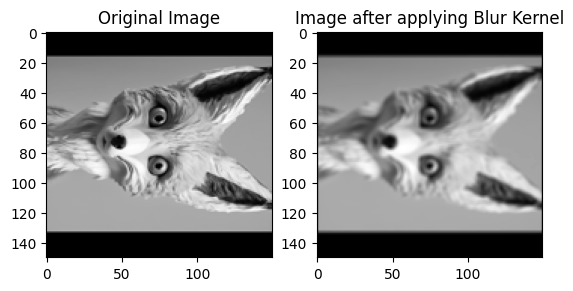

In [5]:
def apply_kernel_and_display(kernel, kernel_name, image):
    model = Sequential([
        Conv2D(filters=1, kernel_size=(3, 3), padding='same', 
               input_shape=(150, 150, 1), 
               kernel_initializer=tf.constant_initializer(kernel))
    ])

    fig = plt.figure()
    fig.add_subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    

    processed_image = model.predict(image_array)
    processed_image = processed_image[0, :, :, 0]
    fig.add_subplot(1,2,2)
    plt.imshow(processed_image, cmap='gray')
    plt.title(f"Image after applying {kernel_name} Kernel")
    plt.show()

for name, kernel in kernels.items():
    apply_kernel_and_display(kernel.reshape(3, 3, 1, 1), name, image_array)


# Excercise 1
* Compare and Contrast: Discuss how each kernel affects the image differently.
* Feature Extraction: Analyze which features are highlighted by each kernel.
* Real-World Application: Relate the kernels to practical applications in image processing.

# Excercise 2
What are these kernels created to find?

In [ ]:

kernels = {
    "kernel1" :np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]),
    "kernel2": np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]),
    "kernel3": np.array([[1, -2, 1], [-2, 4, -2], [1, -2, 1]]),
    "kernel4": np.array([[0, 0, 0], [0, 1, 0],  [0, 0, 0]]),
    "kernel5": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "kernel6": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
}

for name, kernel in kernels.items():
    apply_kernel_and_display(kernel.reshape(3, 3, 1, 1), name, image_array)


## Bonus Exercise:
Play around with the filters and see if you can create your own that finds some interensting feature.